In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [24]:
df = pd.read_csv("fcc-forum-pageviews.csv",index_col="date",parse_dates=True)

In [28]:
df = df.loc[(df["value"]>=df["value"].quantile(0.025))&
(df["value"]<=df["value"].quantile(0.975))]
df.astype(float)

,value
date,
2016-06-17,21691.0
2016-06-18,21681.0
2016-06-20,28508.0
2016-06-21,26805.0
2016-06-25,21923.0
...,...
2019-11-03,130118.0
2019-11-09,115642.0
2019-11-10,117717.0


In [29]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(32,10),dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df,legend=False,palette=["r"])


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


In [31]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["year"]=df_bar.index.year
    df_bar["month"]=df_bar.index.month

    # Draw bar plot
    df_bar=df_bar.groupby(["year","month"])["value"].mean()
    df_bar=df_bar.unstack()
    df_bar.columns=["January","February","March","April","May","June","July","August","September","October","November","December"]

    fig=df_bar.plot(kind="bar",figsize=(15,10)).figure
    plt.xlabel("Years",fontsize=15)
    plt.ylabel("Average Page Views",fontsize=15)
    plt.legend(loc="upper left",title="Months",fontsize=15)


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

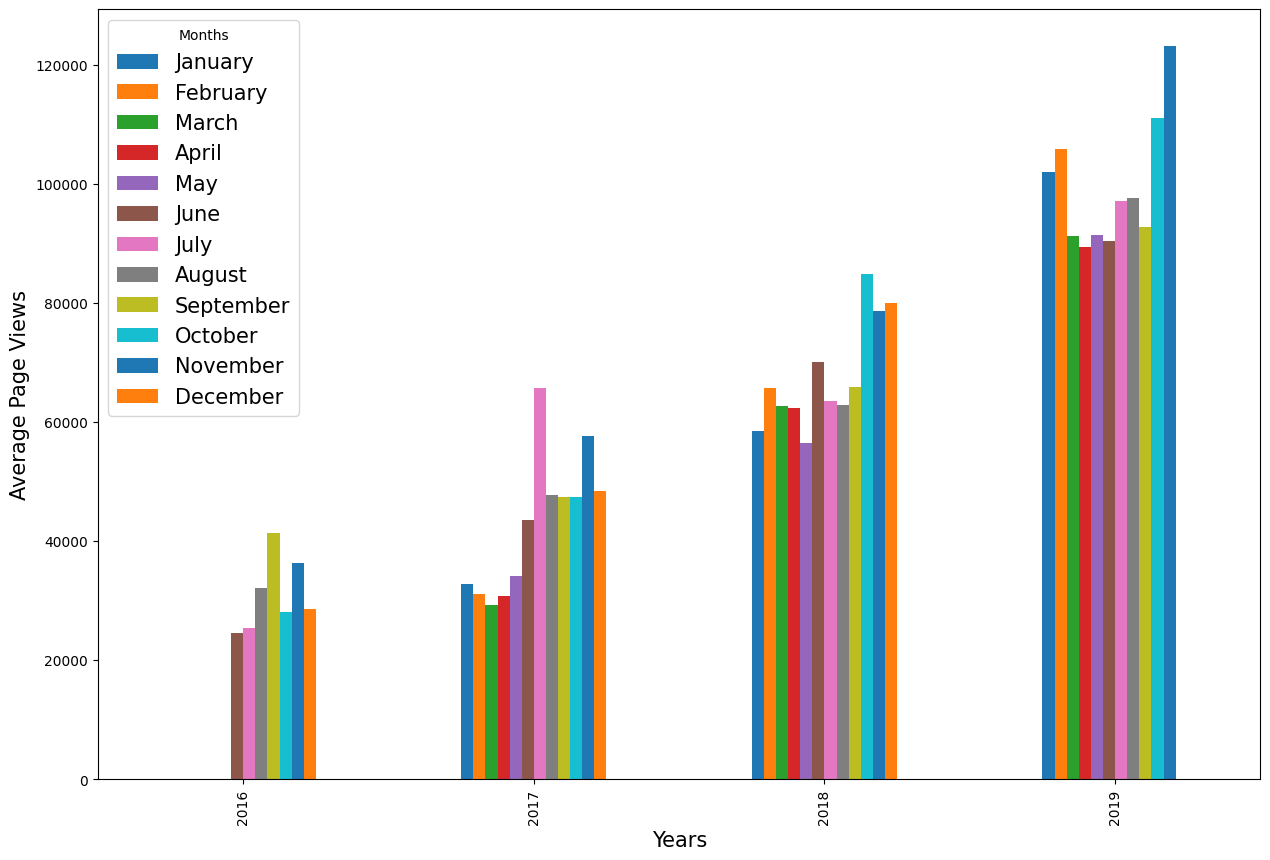

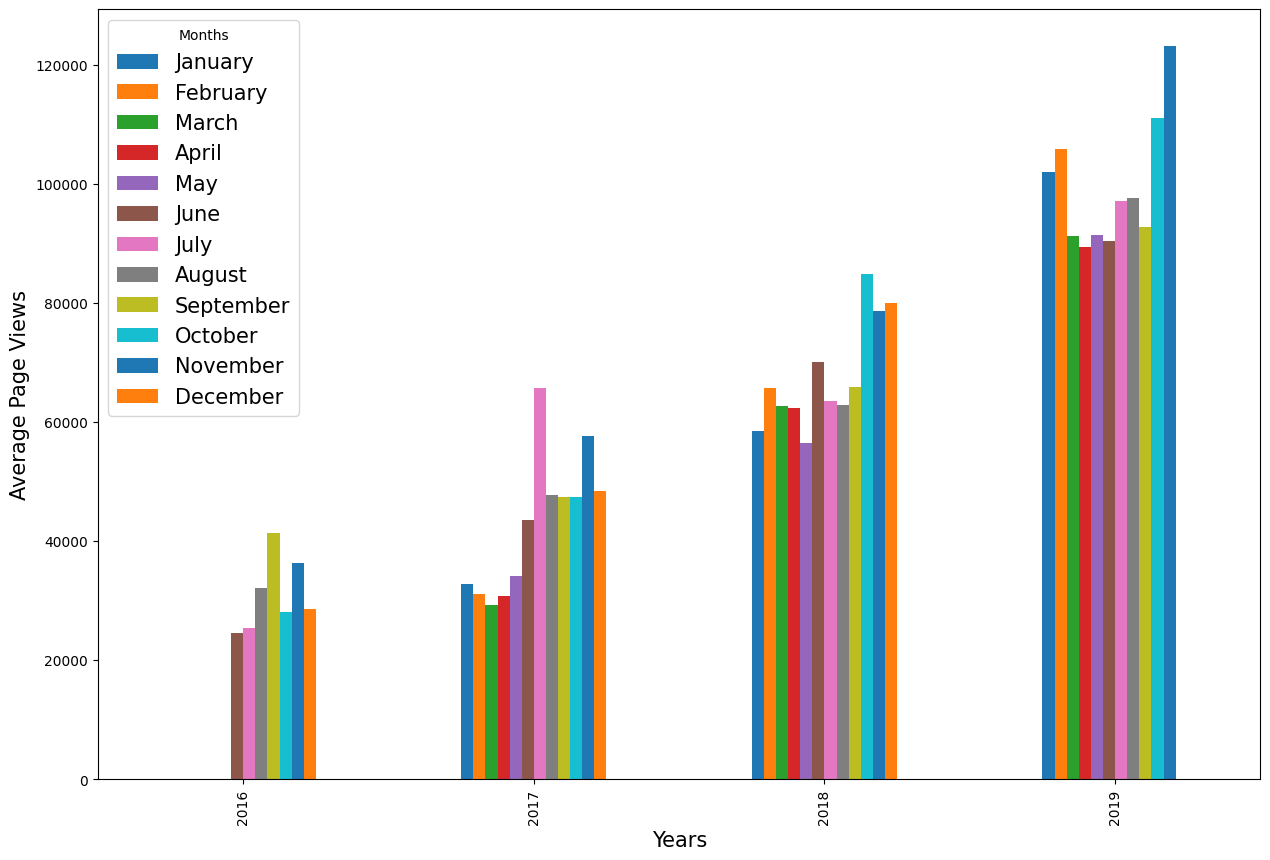

In [32]:
draw_bar_plot()

In [33]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
    sns.boxplot(data=df_box,ax=ax1,x="year",y="value")
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

    month_order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    df_box["month"]=pd.Categorical(df_box["month"],categories=month_order,ordered=True)

    sns.boxplot(data=df_box,ax=ax2,x="month",y="value")
    ax2.set_title("Month-wise Box Plot (Seasonlity)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
